<a href="https://colab.research.google.com/github/ashborn8/Ejercicio-RA2/blob/main/Ejercicio_RA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Paso 1: importar las bibliotecas necesarias

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#Paso 2: cargar y procesar los datos

11490434/11490434 [==============================] - 0s 0us/step


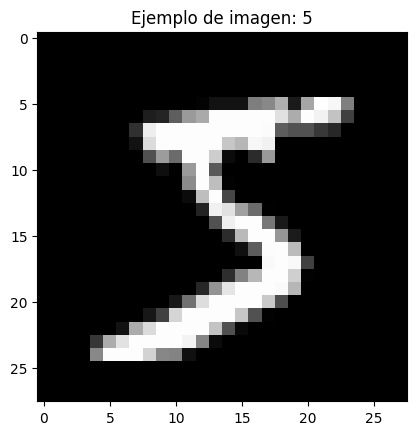

In [3]:
# Cargar el conjunto  de datos mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los datos  (valores entre 0 y 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#Visualizar  un ejemplo  de los datos
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Ejemplo de imagen: {y_train[0]}')
plt.show()

#Convertir las etiquetas  a formato "one-shot" (10 categorias)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Paso 3: Construir el modelo de perceptron multicapa

In [4]:
# crear el modelo  del Perceptron multicapa
model = Sequential()

#Aplacar las imagenes  de 28x28  en un vextor  de 784
model.add(Flatten(input_shape=(28, 28)))

#Añadir la prmera capa  oculta con 128 neuronas y activacion ReLU
model.add(Dense(128, activation='relu'))

#Añadir la segunda capa oculta con 64 neuronas y activacion ReLU
model.add(Dense(64, activation='relu'))

#Añadir la capa de salida con 10 neuronas (una por clase) y activasion softmax
model.add(Dense(10, activation='softmax'))

#Compilar el modelo con optimizador Adam y funcion de perida de categoria
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Paso 4: Entrenar el modelo

In [5]:
#Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2421 - accuracy: 0.9301 - val_loss: 0.1307 - val_accuracy: 0.9601
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1039 - accuracy: 0.9679 - val_loss: 0.0999 - val_accuracy: 0.9676
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0725 - accuracy: 0.9776 - val_loss: 0.0860 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0536 - accuracy: 0.9829 - val_loss: 0.0813 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0793 - val_accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0358 - accuracy: 0.9885 - val_loss: 0.0835 - val_accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0295 - accuracy: 0.9903 - val_loss: 0.0852 - val_accuracy:

#paso 5: Evaluar el modelo

In [6]:
#Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Precision en el conjunto de prueba: {test_accuracy:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0986 - accuracy: 0.9776
Precision en el conjunto de prueba: 0.9776


# Paso 6: Visualizar los resultados

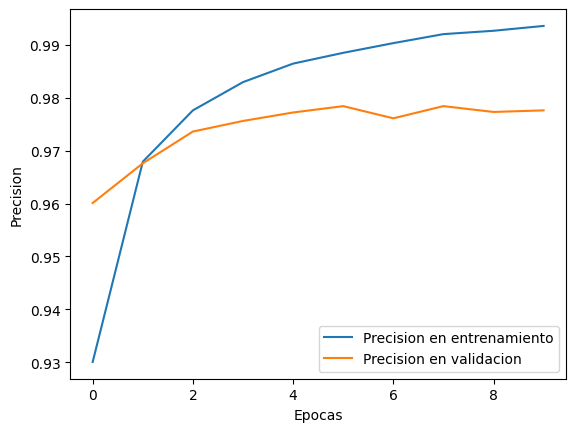

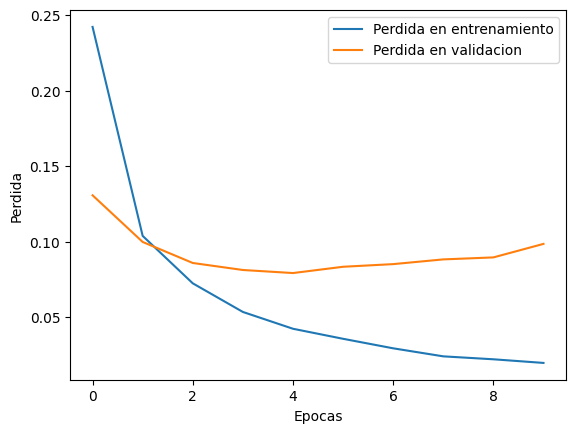

In [7]:
#graficar la precision en entrenamiento y validacion
plt.plot(history.history['accuracy'], label='Precision en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precision en validacion')
plt.xlabel('Epocas')
plt.ylabel('Precision')
plt.legend()
plt.show()

#Graficar la perdida en entrenamiento y validacion
plt.plot(history.history['loss'], label='Perdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Perdida en validacion')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.legend()
plt.show()